In [1]:
%matplotlib inline
import os
import sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_orig()

/local/home/Asif/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/local/home/Asif/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [2]:
import deepdish as dd
data = dd.io.load('/local/home/Asif/data/tmp/ards_irregular.h5')

In [4]:
data.keys()

dict_keys(['features', 'pid', 'times', 'values'])

In [11]:
X = data['values']
T = data['times']
len(X)

313368

In [24]:
def squared_exponential(distance, alpha=1):
    return np.exp((distance*alpha)**2 / -2)

In [74]:
def ks(r,t,x, alpha=None):
    """kernel smoothing, all inputs are shape: [L,1]
    uses median trick to calculate bandwidth if alpha==None"""
    w = np.sqrt(np.square(r - t.T))
    wi = w.sum(1)
    if alpha is None:
        alpha = np.quantile(wi, 0.5)
    print(alpha)
    Krt = squared_exponential(w, alpha)
    xh = np.sum(Krt * x.T,1) / Krt.sum(1)
    return xh

99.42834595959597


Text(0.5, 1.0, 'RespRate')

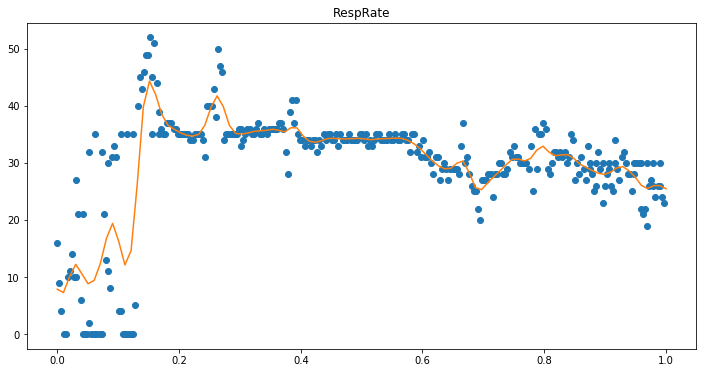

In [81]:
r = np.linspace(0,1,100)[:,np.newaxis]

plt.figure(figsize=(12,6))
ax = plt.subplot(1,1,1)

i = 70
xh = ks(r, T[i], X[i])
plt.plot(T[i], X[i],'o')
plt.plot(r, xh)
plt.title(data['features'][i])